In [6]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
%cd /content/drive/My Drive/psd/dataset psd

/content/drive/My Drive/dataset psd


In [10]:
import os
import librosa
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis, mode
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pickle

In [11]:
# Fungsi untuk menghitung statistik audio
def calculate_statistics(audio_path):
    y, sr = librosa.load(audio_path)

    # Menghitung statistik
    mean = np.mean(y)
    std_dev = np.std(y)
    max_value = np.max(y)
    min_value = np.min(y)
    median = np.median(y)
    skewness = skew(y)
    kurt = kurtosis(y)
    q1 = np.percentile(y, 25)
    q3 = np.percentile(y, 75)
    mode_value, _ = mode(y)
    iqr = q3 - q1

    zcr_mean = np.mean(librosa.feature.zero_crossing_rate(y=y))
    zcr_median = np.median(librosa.feature.zero_crossing_rate(y=y))
    zcr_std_dev = np.std(librosa.feature.zero_crossing_rate(y=y))
    zcr_kurtosis = kurtosis(librosa.feature.zero_crossing_rate(y=y)[0])
    zcr_skew = skew(librosa.feature.zero_crossing_rate(y=y)[0])

    rms = np.sum(y**2) / len(y)
    rms_median = np.median(y**2)
    rms_std_dev = np.std(y**2)
    rms_kurtosis = kurtosis(y**2)
    rms_skew = skew(y**2)

    return [mean, std_dev, max_value, min_value, median, skewness, kurt, q1, q3, mode_value, iqr, zcr_mean, zcr_median, zcr_std_dev, zcr_kurtosis, zcr_skew, rms, rms_median, rms_std_dev, rms_kurtosis, rms_skew]

In [12]:
# Daftar folder yang akan dianalisis
folders = [
    'YAF_sad', 'YAF_pleasant_surprised', 'YAF_neutral', 'YAF_happy', 'YAF_fear', 'YAF_disgust', 'YAF_angry',
    'OAF_Sad', 'OAF_Pleasant_surprise', 'OAF_neutral', 'OAF_happy', 'OAF_Fear', 'OAF_disgust', 'OAF_angry'
]

In [13]:
# Membuat DataFrame untuk menyimpan hasil
data = []

In [14]:
for folder in folders:
    folder_path = f'{folder}'
    for filename in os.listdir(folder_path):
        if filename.endswith('.wav'):
            audio_path = os.path.join(folder_path, filename)
            statistics = calculate_statistics(audio_path)
            data.append([folder, filename] + statistics)

# Membuat DataFrame dari data
columns =  ['Label', 'File'] + ['Mean', 'Std Dev', 'Max', 'Min', 'Median', 'Skew', 'Kurtosis', 'Q1', 'Q3', 'Mode', 'IQR', 'ZCR Mean', 'ZCR Median', 'ZCR Std Dev', 'ZCR Kurtosis', 'ZCR Skew', 'RMSE', 'RMSE Median', 'RMSE Std Dev', 'RMSE Kurtosis', 'RMSE Skew']
df = pd.DataFrame(data, columns=columns)

In [17]:
# Menyimpan DataFrame ke dalam file CSV
df.to_csv('/content/drive/My Drive//psd/dataset psd/csv/hasil_zcr-rms_audio.csv', index=False)

In [20]:
# Import Library
import sklearn
import matplotlib.pyplot as plt

#menampilkan data
data = pd.read_csv('/content/drive/My Drive/psd/dataset psd/csv/hasil_zcr-rms_audio.csv')
data.head()

,Label,File,Mean,Std Dev,Max,Min,Median,Skew,Kurtosis,Q1,...,ZCR Mean,ZCR Median,ZCR Std Dev,ZCR Kurtosis,ZCR Skew,RMSE,RMSE Median,RMSE Std Dev,RMSE Kurtosis,RMSE Skew
0,YAF_sad,YAF_bone_sad.wav,-0.000052,0.044493,0.150763,-0.264091,0.001693,-1.049880,3.073375,-0.012214,...,0.126306,0.027832,0.225606,3.549219,2.267755,0.001980,0.000378,0.004461,43.650433,5.330623
1,YAF_sad,YAF_doll_sad.wav,-0.000040,0.038879,0.138458,-0.199509,0.002490,-0.943075,2.557409,-0.012728,...,0.130381,0.031982,0.223911,3.041670,2.149263,0.001512,0.000326,0.003228,25.953508,4.361503
2,YAF_sad,YAF_lease_sad.wav,-0.000040,0.039764,0.166516,-0.239656,0.000997,-0.824456,2.982898,-0.011608,...,0.202110,0.052734,0.265853,-0.295755,1.211403,0.001581,0.000247,0.003531,30.825792,4.648959
3,YAF_sad,YAF_gin_sad.wav,-0.000044,0.040025,0.151695,-0.193927,0.001049,-0.847394,1.556117,-0.013077,...,0.136461,0.028320,0.212361,2.286260,1.913812,0.001602,0.000358,0.003023,13.735219,3.322283
4,YAF_sad,YAF_chain_sad.wav,-0.000032,0.040490,0.124023,-0.185162,0.002544,-0.878576,1.781819,-0.014427,...,0.151560,0.027588,0.230611,1.480052,1.700917,0.001639,0.000404,0.003189,20.123266,3.860454


In [21]:
# Pembagian dataset
from sklearn.model_selection import train_test_split

In [22]:
# memisahkan kolom fitur dan target
fitur = data.drop(columns=['Label','File'], axis =1)
target = data['Label']

In [23]:
# membagi dataset menjadi data training dan data testing
fitur_train, fitur_test, target_train, target_test = train_test_split(fitur, target, test_size = 0.2, random_state=42)

In [24]:
# Normalisasi dengan ZSCORE
from sklearn.preprocessing import StandardScaler
scaler_1 = StandardScaler()

In [25]:
zscore_fitur_train = scaler_1.fit_transform(fitur_train)
zscore_fitur_test = scaler_1.fit_transform(fitur_test)

In [26]:
zscore_fitur_train

array([[-0.24992122, -0.20987645, -0.11579112, ..., -0.38141586,
        -0.33890853, -0.29489796],
       [-0.50319956,  1.4812772 ,  0.88734729, ...,  1.13823881,
        -0.30415939, -0.18183646],
       [-0.23713455,  0.76146501, -0.49789798, ...,  0.12455824,
        -0.70360441, -0.81344775],
       ...,
       [-0.01451285, -0.48372567, -0.26697413, ..., -0.48395678,
        -0.22383455, -0.17983123],
       [ 0.29093705,  0.89248099,  1.33225501, ...,  0.56988403,
         0.41539137,  0.52983609],
       [-0.39650443,  0.49781655,  0.09637338, ...,  0.08200319,
        -0.5561862 , -0.54484194]])

In [27]:
zscore_fitur_test

array([[-0.10010657, -0.48365034, -0.01207523, ..., -0.40433498,
         0.52995551,  0.90100996],
       [-0.63498882,  2.03824038,  0.87699294, ...,  1.41096058,
        -0.65708951, -0.80106474],
       [ 1.48994521, -0.43141176, -0.37249722, ..., -0.42743456,
        -0.16599266,  0.05521848],
       ...,
       [-0.03507082, -0.43277091, -0.11191291, ..., -0.43206246,
         0.16550574,  0.19395639],
       [-0.39327147,  2.82553174,  2.43529623, ...,  3.61972965,
         0.73078057,  0.88062855],
       [ 2.14331238, -0.37801942, -0.58495914, ..., -0.45701302,
         0.39272786,  0.34221932]])

In [30]:
# Simpan Normalisasi ZScore dengan file pickle
file = '/content/drive/My Drive/psd/dataset psd/pickle/zscore.pkl'

with open(file, 'wb') as file:
    pickle.dump(scaler_1, file)

In [31]:
# Normalisasi dengan MINMAX
from sklearn.preprocessing import MinMaxScaler
scaler_2 = MinMaxScaler()

minmax_fitur_train = scaler_2.fit_transform(fitur_train)
minmax_fitur_test = scaler_2.fit_transform(fitur_test)

In [32]:
minmax_fitur_train

array([[0.53322114, 0.18385362, 0.16827015, ..., 0.04162439, 0.04720655,
        0.13438394],
       [0.51536514, 0.48859439, 0.34361476, ..., 0.24598034, 0.04972791,
        0.14563075],
       [0.53412259, 0.35888641, 0.10147938, ..., 0.10966538, 0.02074457,
        0.08280111],
       ...,
       [0.54981731, 0.13450681, 0.14184396, ..., 0.02783517, 0.05555621,
        0.14583022],
       [0.57135139, 0.3824951 , 0.42138286, ..., 0.16955068, 0.10193783,
        0.2164245 ],
       [0.52288709, 0.31137776, 0.20535566, ..., 0.10394278, 0.03144109,
        0.10952072]])

In [33]:
minmax_fitur_test

array([[0.48121796, 0.14589442, 0.17966847, ..., 0.04111684, 0.13960367,
        0.28119407],
       [0.41425847, 0.62569459, 0.32496073, ..., 0.31530899, 0.03767033,
        0.10193951],
       [0.68026936, 0.15583303, 0.12076801, ..., 0.03762776, 0.07984155,
        0.19211926],
       ...,
       [0.48935949, 0.15557445, 0.16335292, ..., 0.03692873, 0.10830782,
        0.20673049],
       [0.44451797, 0.77548004, 0.57961994, ..., 0.64893352, 0.15684882,
        0.27904759],
       [0.76206144, 0.16599114, 0.08604731, ..., 0.03316006, 0.12781972,
        0.22234485]])

In [35]:
# Menyimpan MINMAX ke dalam file pickle
file = '/content/drive/My Drive/psd/dataset psd/pickle/minmax1.pkl'

with open(file, 'wb') as file:
    pickle.dump(scaler_2, file)

In [36]:
# Buat dan latih model KNN untuk kategori emosi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [37]:
# Normalisasi ZScore

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Lists untuk menyimpan hasil akurasi
akurasi_k = []

# Maksimum akurasi dan nilai K-nya
maksimum_akurasi = 0
nilai_k_terbaik = None
model_knn_terbaik = None

# Coba berbagai nilai K dari 1 hingga 30
for k in range(1, 31):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(zscore_fitur_train, target_train)
    y_pred = knn.predict(zscore_fitur_test)
    akurasi = accuracy_score(target_test, y_pred)
    akurasi_k.append(akurasi)

    # Cek apakah akurasi saat ini lebih tinggi dari maksimum
    if akurasi > maksimum_akurasi:
        maksimum_akurasi = akurasi
        nilai_k_terbaik = k
        model_zscore_terbaik = knn

In [38]:
# Cetak akurasi untuk berbagai nilai K
for k, akurasi in enumerate(akurasi_k, start=1):
    print(f"Nilai K {k} memiliki akurasi {akurasi:.4f}")

# Cetak akurasi tertinggi dan nilai K-nya
print("\nAkurasi Tertinggi:", maksimum_akurasi)
print("Nilai K Terbaik:", nilai_k_terbaik)

Nilai K 1 memiliki akurasi 0.7643
Nilai K 2 memiliki akurasi 0.7536
Nilai K 3 memiliki akurasi 0.7750
Nilai K 4 memiliki akurasi 0.7804
Nilai K 5 memiliki akurasi 0.7768
Nilai K 6 memiliki akurasi 0.7732
Nilai K 7 memiliki akurasi 0.7804
Nilai K 8 memiliki akurasi 0.7679
Nilai K 9 memiliki akurasi 0.7714
Nilai K 10 memiliki akurasi 0.7696
Nilai K 11 memiliki akurasi 0.7661
Nilai K 12 memiliki akurasi 0.7554
Nilai K 13 memiliki akurasi 0.7607
Nilai K 14 memiliki akurasi 0.7571
Nilai K 15 memiliki akurasi 0.7589
Nilai K 16 memiliki akurasi 0.7571
Nilai K 17 memiliki akurasi 0.7518
Nilai K 18 memiliki akurasi 0.7589
Nilai K 19 memiliki akurasi 0.7679
Nilai K 20 memiliki akurasi 0.7589
Nilai K 21 memiliki akurasi 0.7714
Nilai K 22 memiliki akurasi 0.7696
Nilai K 23 memiliki akurasi 0.7536
Nilai K 24 memiliki akurasi 0.7661
Nilai K 25 memiliki akurasi 0.7643
Nilai K 26 memiliki akurasi 0.7589
Nilai K 27 memiliki akurasi 0.7661
Nilai K 28 memiliki akurasi 0.7607
Nilai K 29 memiliki akurasi 0

In [40]:
# Simpan model KNN dengan akurasi tertinggi
file = '/content/drive/My Drive/psd/dataset psd/pickle/model_zscore_terbaik.pkl'
with open(file, 'wb') as file:
    pickle.dump(model_zscore_terbaik, file)

In [41]:
# Normalisasi MinMax
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Lists untuk menyimpan hasil akurasi
akurasi_k_minmax = []

# Maksimum akurasi dan nilai K-nya
maksimum_akurasi_minmax = 0
nilai_k_terbaik_minmax = None
model_knn_terbaik_minmax = None

# Coba berbagai nilai K dari 1 hingga 20
for k in range(1,31):
    knn_minmax = KNeighborsClassifier(n_neighbors=k)
    knn_minmax.fit(minmax_fitur_train, target_train)
    y_pred_minmax = knn_minmax.predict(minmax_fitur_test)
    akurasi_minmax = accuracy_score(target_test, y_pred_minmax)
    akurasi_k_minmax.append(akurasi_minmax)

    # Cek apakah akurasi saat ini lebih tinggi dari maksimum
    if akurasi_minmax > maksimum_akurasi_minmax:
        maksimum_akurasi_minmax = akurasi_minmax
        nilai_k_terbaik_minmax = k
        model_knn_terbaik_minmax = knn_minmax

In [42]:
# Akurasi dengan normalisasi MinMax
for k, akurasi_minmax in enumerate(akurasi_k_minmax, start=1):
    print(f"Nilai K {k} memiliki akurasi dengan Normalisasi MinMax {akurasi_minmax:.4f}")

# Cetak akurasi tertinggi dan nilai K-nya
print("\nAkurasi Tertinggi dengan Normalisasi MinMax:", maksimum_akurasi_minmax)
print("Nilai K Terbaik dengan Normalisasi MinMax:", nilai_k_terbaik_minmax)

Nilai K 1 memiliki akurasi dengan Normalisasi MinMax 0.5893
Nilai K 2 memiliki akurasi dengan Normalisasi MinMax 0.5929
Nilai K 3 memiliki akurasi dengan Normalisasi MinMax 0.5982
Nilai K 4 memiliki akurasi dengan Normalisasi MinMax 0.6036
Nilai K 5 memiliki akurasi dengan Normalisasi MinMax 0.6446
Nilai K 6 memiliki akurasi dengan Normalisasi MinMax 0.6536
Nilai K 7 memiliki akurasi dengan Normalisasi MinMax 0.6625
Nilai K 8 memiliki akurasi dengan Normalisasi MinMax 0.6714
Nilai K 9 memiliki akurasi dengan Normalisasi MinMax 0.6732
Nilai K 10 memiliki akurasi dengan Normalisasi MinMax 0.6786
Nilai K 11 memiliki akurasi dengan Normalisasi MinMax 0.6911
Nilai K 12 memiliki akurasi dengan Normalisasi MinMax 0.6982
Nilai K 13 memiliki akurasi dengan Normalisasi MinMax 0.6911
Nilai K 14 memiliki akurasi dengan Normalisasi MinMax 0.6857
Nilai K 15 memiliki akurasi dengan Normalisasi MinMax 0.6946
Nilai K 16 memiliki akurasi dengan Normalisasi MinMax 0.6964
Nilai K 17 memiliki akurasi denga

In [44]:
# Simpan model KNN dengan akurasi tertinggi dengan Normalisasi MinMax
file_minmax = '/content/drive/My Drive/psd/dataset psd/pickle/model_knn_terbaik_minmax.pkl'
with open(file_minmax, 'wb') as file:
    pickle.dump(model_knn_terbaik_minmax, file)

In [46]:
from sklearn.decomposition import PCA

In [47]:
# Menggunakan PCA untuk reduksi fitur
pca = PCA(n_components=10)  # Ganti jumlah komponen sesuai kebutuhan
reduced_train = pca.fit_transform(zscore_fitur_train)
reduced_test = pca.transform(zscore_fitur_test)

In [48]:
file_pca_zscore = '/content/drive/My Drive/psd/dataset psd/pca/pca_zscore.pkl'
with open(file_pca_zscore, 'wb') as file:
    pickle.dump(pca, file)

In [49]:
# Latih model KNN dengan fitur yang sudah direduksi
knn_reduced = KNeighborsClassifier(n_neighbors=5)
knn_reduced.fit(reduced_train, target_train)

KNeighborsClassifier()

In [50]:
file_knn_pca_zscore = '/content/drive/My Drive/psd/dataset psd/pca/knn_pca_zscore.pkl'
with open(file_knn_pca_zscore, 'wb') as file:
    pickle.dump(knn_reduced, file)

In [51]:
# Hitung akurasi model yang telah direduksi fiturnya
y_pred_knn_reduced = knn_reduced.predict(reduced_test)
akurasi_reduced = accuracy_score(target_test, y_pred_knn_reduced)
print("Akurasi dengan Reduksi Fitur:", akurasi_reduced)

Akurasi dengan Reduksi Fitur: 0.7607142857142857


In [52]:
# Bandingkan akurasi model sebelum dan setelah reduksi fitur
print("Akurasi sebelum Reduksi Fitur (ZScore):", maksimum_akurasi)
print("Akurasi setelah Reduksi Fitur (ZScore):", akurasi_reduced)

Akurasi sebelum Reduksi Fitur (ZScore): 0.7803571428571429
Akurasi setelah Reduksi Fitur (ZScore): 0.7607142857142857


In [53]:
# Buat grafik perbandingan akurasi
import matplotlib.pyplot as plt

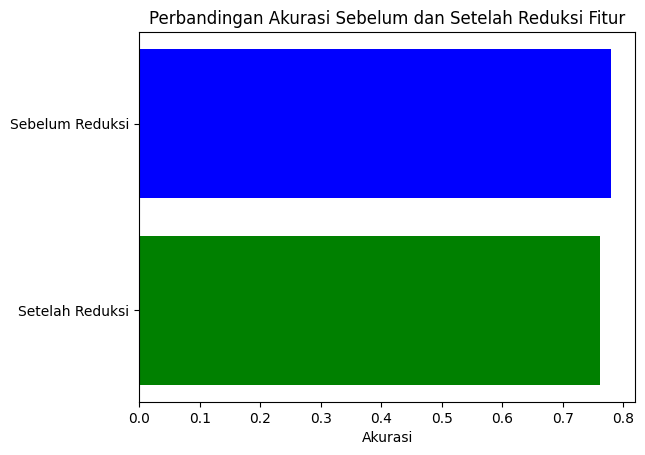

In [54]:
import matplotlib.pyplot as plt

akurasi_sebelum = [maksimum_akurasi]
akurasi_sesudah = [akurasi_reduced]

labels = ["Sebelum Reduksi", "Setelah Reduksi"]

plt.barh(labels, akurasi_sebelum + akurasi_sesudah, color=['blue', 'green'])
plt.xlabel("Akurasi")
plt.title("Perbandingan Akurasi Sebelum dan Setelah Reduksi Fitur")
plt.gca().invert_yaxis()  # Memutar label agar sesuai dengan urutan yang diinginkan
plt.show()


In [55]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
pca.fit(zscore_fitur_train)

pca_train = pca.transform(zscore_fitur_train)
pca_test = pca.transform(zscore_fitur_test)

In [56]:
akurasi_maks = 0
k_terbaik = []

# List untuk menyimpan nilai akurasi
akurasi_list = []

for k in list(range(1, 31)):

    # membangun model KNN
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(pca_train, target_train)
    y_pred_knn = knn.predict(pca_test)


    # akurasi
    akurasi = accuracy_score(target_test, y_pred_knn)
    akurasi_list.append(akurasi)

    print("Hasil akurasi dengan k =", k, ":", akurasi)

    if akurasi > akurasi_maks:
        akurasi_maks = akurasi
        k_terbaik = [k]
    elif akurasi == akurasi_maks:
        k_terbaik.append(k)

print("\nHasil akurasi tertinggi adalah", akurasi_maks, "pada k =", k_terbaik)

Hasil akurasi dengan k = 1 : 0.7303571428571428
Hasil akurasi dengan k = 2 : 0.7392857142857143
Hasil akurasi dengan k = 3 : 0.7660714285714286
Hasil akurasi dengan k = 4 : 0.7678571428571429
Hasil akurasi dengan k = 5 : 0.7607142857142857
Hasil akurasi dengan k = 6 : 0.7732142857142857
Hasil akurasi dengan k = 7 : 0.7589285714285714
Hasil akurasi dengan k = 8 : 0.7553571428571428
Hasil akurasi dengan k = 9 : 0.7625
Hasil akurasi dengan k = 10 : 0.7553571428571428
Hasil akurasi dengan k = 11 : 0.7428571428571429
Hasil akurasi dengan k = 12 : 0.7428571428571429
Hasil akurasi dengan k = 13 : 0.75
Hasil akurasi dengan k = 14 : 0.75
Hasil akurasi dengan k = 15 : 0.7428571428571429
Hasil akurasi dengan k = 16 : 0.7571428571428571
Hasil akurasi dengan k = 17 : 0.7482142857142857
Hasil akurasi dengan k = 18 : 0.7571428571428571
Hasil akurasi dengan k = 19 : 0.7553571428571428
Hasil akurasi dengan k = 20 : 0.7517857142857143
Hasil akurasi dengan k = 21 : 0.75
Hasil akurasi dengan k = 22 : 0.75

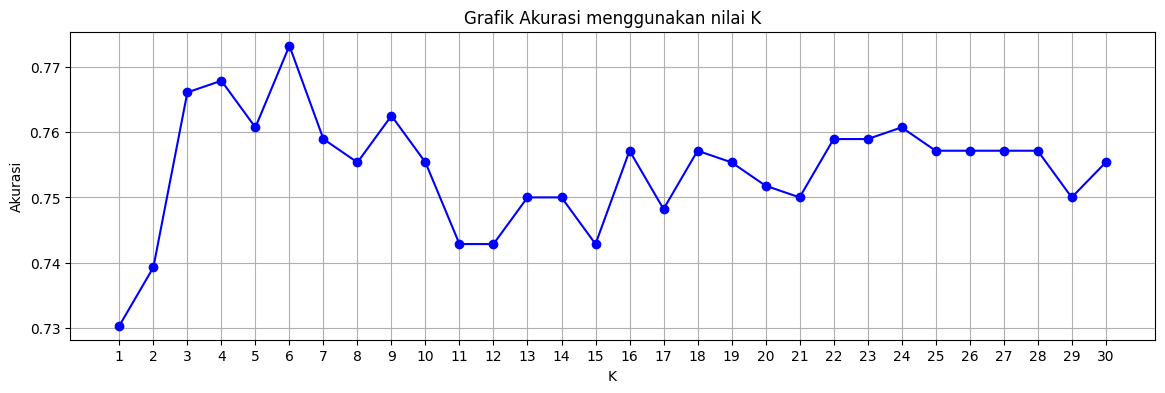

In [57]:
# Membuat grafik
plt.figure(figsize=(14, 4))
plt.plot(list(range(1, 31)), akurasi_list, marker='o', linestyle='-', color='blue')
plt.title('Grafik Akurasi menggunakan nilai K')
plt.xlabel('K')
plt.ylabel('Akurasi')
plt.grid(True)
plt.xticks(list(range(1, 31)))
plt.show()

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Mendefinisikan parameter yang ingin diuji
param_grid = {
    'n_neighbors': list(range(1, 31)),  # untuk nilai k-
    'weights': ['uniform', 'distance'],  # pengaturan cara bobot jarak antara tetangga-tetangga dalam proses prediksi
    'metric': ['euclidean', 'manhattan']  # metode pengukuran jarak antara titik data
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(pca_train, target_train)

# Menampilkan parameter terbaik
print("Parameter terbaik : ", grid_search.best_params_)

# Menampilkan akurasi terbaik
print("Akurasi terbaik : ", grid_search.best_score_)

Parameter terbaik :  {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'distance'}
Akurasi terbaik :  0.7696428571428571


In [59]:
accuracies=[]
n_components_range = range(1,10)
k_range= range(1,31)
for n_components in n_components_range:
    for k in k_range:
        pca = PCA(n_components=n_components)
        X_train_pca = pca.fit_transform(zscore_fitur_train)
        X_test_pca = pca.transform(zscore_fitur_test)


        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train_pca, target_train)

        # Melakukan prediksi pada data uji
        y_pred = knn.predict(X_test_pca)
        accuracy = accuracy_score(target_test, y_pred)
        # Menambahkan akurasi ke dalam list
        accuracies.append((n_components, k,accuracy))

# Menampilkan list akurasi untuk setiap nilai n_components
for n,k, accuracy in accuracies:
    print(f"n_components = {n}, K={k}, Akurasi = {accuracy * 100:.2f}%")

n_components = 1, K=1, Akurasi = 23.75%
n_components = 1, K=2, Akurasi = 26.43%
n_components = 1, K=3, Akurasi = 25.71%
n_components = 1, K=4, Akurasi = 25.71%
n_components = 1, K=5, Akurasi = 26.61%
n_components = 1, K=6, Akurasi = 28.21%
n_components = 1, K=7, Akurasi = 27.32%
n_components = 1, K=8, Akurasi = 26.07%
n_components = 1, K=9, Akurasi = 27.32%
n_components = 1, K=10, Akurasi = 28.57%
n_components = 1, K=11, Akurasi = 26.43%
n_components = 1, K=12, Akurasi = 28.57%
n_components = 1, K=13, Akurasi = 28.57%
n_components = 1, K=14, Akurasi = 29.11%
n_components = 1, K=15, Akurasi = 28.39%
n_components = 1, K=16, Akurasi = 26.79%
n_components = 1, K=17, Akurasi = 27.14%
n_components = 1, K=18, Akurasi = 28.75%
n_components = 1, K=19, Akurasi = 28.39%
n_components = 1, K=20, Akurasi = 29.11%
n_components = 1, K=21, Akurasi = 30.54%
n_components = 1, K=22, Akurasi = 30.71%
n_components = 1, K=23, Akurasi = 30.54%
n_components = 1, K=24, Akurasi = 30.36%
n_components = 1, K=25, A

In [ ]:
# Dalam bentuk grid search
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

# Inisialisasi PCA dan KNeighborsClassifier
pca = PCA()
knn = KNeighborsClassifier()

# Gabungkan PCA dan KNeighborsClassifier ke dalam satu pipeline
pipeline = Pipeline([('pca', pca), ('knn', knn)])

# Parameter grid yang akan dicoba
param_grid = {
    'pca__n_components': list(range(1, 11)),  # Jumlah komponen PCA dari 1 hingga 10
    'knn__n_neighbors': list(range(1, 31)),  # Nilai K dari 1 hingga 10
    'knn__metric': ['euclidean', 'manhattan'],
    'knn__weights': ['uniform', 'distance']
}

# Inisialisasi Grid Search dengan cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(zscore_fitur_train, target_train)

# Menampilkan parameter terbaik dan skor terbaik
print("Parameter Terbaik:", grid_search.best_params_)
print("Akurasi Terbaik (pada data latih):", grid_search.best_score_)

# Prediksi pada data uji dengan parameter terbaik
y_pred = grid_search.predict(zscore_fitur_test)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


In [ ]:
best_accuracy = 0.0
best_n_components = 0
best_k = 0

for n, k, accuracy in accuracies:
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n_components = n
        best_k = k

print(f"Perpaduan terbaik: n_components = {best_n_components}, K = {best_k}, Akurasi = {best_accuracy * 100:.2f}%")

In [ ]:
k_best = 11

accuracies_by_n_components = {n: [] for n in n_components_range}

for n, k, accuracy in accuracies:
    accuracies_by_n_components[n].append(accuracy)

# Menghitung rata-rata akurasi untuk setiap n_components
average_accuracies = [np.mean(accuracies_by_n_components[n]) for n in n_components_range]

plt.figure(figsize=(10, 6))
plt.plot(n_components_range, [accuracy * 100 for accuracy in average_accuracies], marker='o', linestyle='-')

plt.title(f'Grafik Akurasi Berdasarkan n_components (K terbaik = {k_best})')
plt.xlabel('n_components')
plt.ylabel('Akurasi (%)')
plt.grid(True)
plt.xticks(n_components_range)
plt.show()

In [ ]:
plt.figure(figsize=(14, 4))
plt.plot(range(30, 0, -1), akurasi_list, marker='o', linestyle='-', color='blue')
plt.title('Grafik akurasi dari jumlah fitur yang digunakan')
plt.xlabel('Jumlah komponen PCA')
plt.ylabel('Akurasi')
plt.grid(True)
plt.xticks(range(30, 0, -1))
plt.show()